# Analyze numerical data
Only the results documented in the paper are produced here

In [1]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dexplot as dxp
import tikzplotlib
from collections import Counter
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image
import numpy as np
import copy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import urllib
import requests
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_csv('./Output/CleanedNumericalData.csv')
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,Condition,Points multiple choice,Points,PointsQ1Q2Q3,PointsQ4Q5Q6,Points all
0,25.0,0,0,0,1,0,0,0,0,0,1,1,1,0,4,3,0,3,7
1,26.0,1,1,0,0,0,0,1,1,1,1,1,0,0,4,5,3,2,9
2,30.0,0,1,0,1,0,0,1,1,1,1,1,1,0,6,6,3,3,12
3,30.0,1,0,0,1,0,0,1,0,0,1,0,1,1,2,3,1,2,5
4,24.0,0,0,0,1,0,0,1,0,1,1,1,1,0,3,5,2,3,8


### Analysis 1: determine which demographic information influences volunteers' score

#### Significantly different quantities

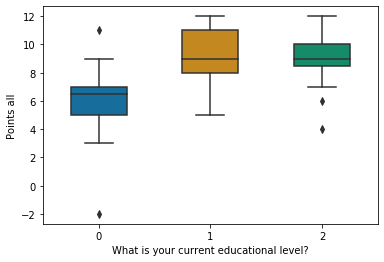

In [3]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'What is your current educational level?'
sy= 'Points all'
sns.boxplot(y=sy, x=sx, 
                 data=Cleaned_Data2, 
                 width=0.5,
                 palette="colorblind")
tikzplotlib.save("./Output/Plots/Education_influence.tex")

In [4]:
sx = 'What is your current educational level?'
sy= 'Points all'
Cleaned_DataMasterPhD = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 2])
Cleaned_DataBach = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataHighMiddle = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
ss = [Cleaned_DataMasterPhD, Cleaned_DataBach, Cleaned_DataHighMiddle]
print(stats.kruskal(Cleaned_DataMasterPhD[sy], Cleaned_DataHighMiddle[sy],Cleaned_DataBach[sy]))

for i in range(len(ss)):
    for j in range(len(ss)):
        if i<j:
            statistics, p_value = stats.mannwhitneyu(ss[i][sy], ss[j][sy],
                                                     use_continuity = False, alternative = 'two-sided')
            #if p_value<0.05:
            print(ss[i][sx].values[0], ss[j][sx].values[0])
            print(statistics, p_value)

KruskalResult(statistic=17.292794514518647, pvalue=0.0001757589230565015)
2 1
157.0 0.6382281085648528
2 0
223.5 0.001257837628951521
1 0
352.5 0.0001151428087685204


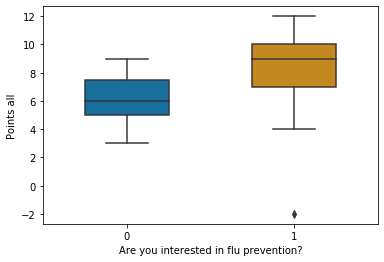

In [5]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Are you interested in flu prevention?'
sy= 'Points all'
sns.boxplot(y=sy, x=sx, 
                 data=Cleaned_Data2, 
                 width=0.5,
                 palette="colorblind")
tikzplotlib.save("./Output/Plots/Interest_flu_prevention_influence.tex")

In [6]:
sx = 'Are you interested in flu prevention?'
sy= 'Points all'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=267.5, pvalue=0.016478032427231067)

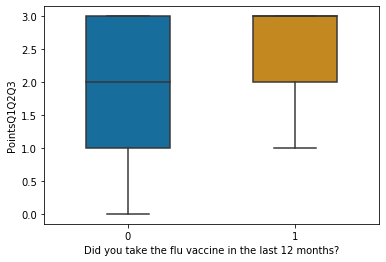

In [7]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Did you take the flu vaccine in the last 12 months?'
sy= 'PointsQ1Q2Q3'
sns.boxplot(y=sy, x=sx, 
                 data=Cleaned_Data2, 
                 width=0.5,
                 palette="colorblind")
tikzplotlib.save("./Output/Plots/Took_flu_vaccine_influence.tex")

In [8]:
sx = 'Did you take the flu vaccine in the last 12 months?'
sy= 'PointsQ1Q2Q3'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=390.0, pvalue=0.024612031734417346)

#### Non-significantly different quantities

In [17]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'What is your gender?'
sy= 'Points all'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=379.5, pvalue=0.9660911220436786)

In [11]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'If you have children, did you vaccinate them or do you wish to vaccinate them?'
sy= 'Points all'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=246.5, pvalue=0.17889776281236758)

In [12]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Are you or any of your family members scientist or health professional?'
sy= 'Points all'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=379.5, pvalue=0.27653915796506234)

In [20]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'What is your age?'
sy= 'Points all'

print(stats.spearmanr(Cleaned_Data2[sx], Cleaned_Data2[sy]))

Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] <=np.median(Cleaned_Data2[sx])])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] >np.median(Cleaned_Data2[sx])])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

SpearmanrResult(correlation=-0.1452930824023476, pvalue=0.2853251926016585)


MannwhitneyuResult(statistic=457.0, pvalue=0.27882561400558303)

### Analysis 2 and main hypothesis: increasing the awareness in flu prevention through StopTheSpread  

#### Comparison between the different average scores

0.75 0.5833333333333334
0.5227272727272727 0.5
0.6818181818181818 0.75
0.8409090909090909 1.0
0.8863636363636364 0.8333333333333334
0.7727272727272727 0.9166666666666666
0.6022727272727273 0.638888888888889
0.6723484848484849 0.7013888888888888


<BarContainer object of 16 artists>

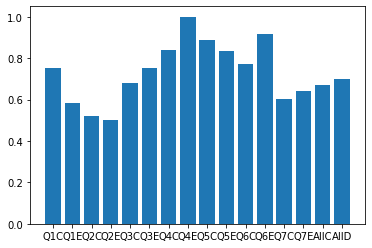

In [14]:
s= ['Is a vaccine necessary for a disease-free population?',
       'How many times we have to typically take a flu shot? ',
       'Is the flu shot accessible to all people? ',
       'How does the flu spread?',
       'Why is it important that you become immune from flu? ',
        'What is the incubation period?',
       'Points multiple choice', 'Points all']

name = ['Q1C', 'Q1E', 'Q2C', 'Q2E','Q3C', 
        'Q3E', 'Q4C', 'Q4E', 'Q5C', 'Q5E', 'Q6C', 'Q6E','Q7C', 'Q7E', 'AllC', 'AllD']


Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sss = 'Condition'
Cleaned_Data2 = Cleaned_Data2[Cleaned_Data2[sss] == 0]
dataC = []
for i in range(len(s)):
    if i ==len(s)-2:
        dataC.append(Cleaned_Data2[s[i]].mean()/6.)
    elif i ==len(s)-1:
        dataC.append(Cleaned_Data2[s[i]].mean()/12.)
    else:
        dataC.append(Cleaned_Data2[s[i]].mean())
        
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sss = 'Condition'
Cleaned_Data2 = Cleaned_Data2[Cleaned_Data2[sss] == 1]
dataE = []
for i in range(len(s)):
    if i ==len(s)-2:
        dataE.append(Cleaned_Data2[s[i]].mean()/6.)
    elif i ==len(s)-1:
        dataE.append(Cleaned_Data2[s[i]].mean()/12.)
    else:
        dataE.append(Cleaned_Data2[s[i]].mean())
Cleaned_Data2['Points multiple choice']=Cleaned_Data2['Points multiple choice']/6.

data_corrected = []
for i in range(len(dataC)):
    data_corrected.append(dataC[i])
    data_corrected.append(dataE[i])
    print(dataC[i], dataE[i])
    
plt.bar(name,data_corrected)

#### Proving that there are no statistical significant differences between control and experimental groups

In [ ]:
s= ['Is a vaccine necessary for a disease-free population?',
       'How many times we have to typically take a flu shot? ',
       'Is the flu shot accessible to all people? ',
       'How does the flu spread?',
       'Why is it important that you become immune from flu? ',
        'What is the incubation period?',
       'Points multiple choice', 'Points all']

In [23]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'Is a vaccine necessary for a disease-free population?'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=220.0, pvalue=0.2615722360139493)

In [24]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'How many times we have to typically take a flu shot? '
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=258.0, pvalue=0.8899170793278576)

In [25]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'Is the flu shot accessible to all people? '
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=282.0, pvalue=0.6518146893352635)

In [26]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'How does the flu spread?'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=306.0, pvalue=0.14323490752466972)

In [27]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'Why is it important that you become immune from flu? '
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=250.0, pvalue=0.6255852315243253)

In [28]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'What is the incubation period?'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=302.0, pvalue=0.27024791232304746)

In [29]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'Points multiple choice'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=276.0, pvalue=0.8076838658228029)

In [30]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
sx = 'Condition'
sy= 'Points all'
Cleaned_DataExp = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 1])
Cleaned_DataCon = copy.deepcopy(Cleaned_Data2[Cleaned_Data2[sx] == 0])
stats.mannwhitneyu(Cleaned_DataExp[sy], Cleaned_DataCon[sy],
                                                 use_continuity = False, alternative = 'two-sided')

MannwhitneyuResult(statistic=274.0, pvalue=0.8404307406933396)

### Analysis 3 (in the appendix): testing prediction based on Google Trends data.  

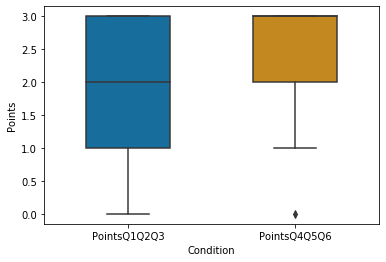

In [15]:
Cleaned_Data2 = copy.deepcopy(Cleaned_Data)
Cleaned_Data2['PointsQ4Q5Q6'].tolist()
data = {'Condition':['PointsQ1Q2Q3' for i in range(len(Cleaned_Data2['PointsQ1Q2Q3'].tolist()))]+['PointsQ4Q5Q6' for i in range(len(Cleaned_Data2['PointsQ4Q5Q6'].tolist()))],
        'Points':Cleaned_Data2['PointsQ1Q2Q3'].tolist()+Cleaned_Data2['PointsQ4Q5Q6'].tolist()} 
  
df = pd.DataFrame(data) 
df.head()
sx = 'Condition'
sy= 'Points'
sns.boxplot(y=sy, x=sx, 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
tikzplotlib.save("./Output/Plots/Comparison_PointsQ1Q2Q3_PointsQ4Q5Q6.tex")

In [16]:
sy= 'Points'
Cleaned_DataExp = copy.deepcopy(df[df[sx] == 'PointsQ1Q2Q3'])
Cleaned_DataCon = copy.deepcopy(df[df[sx] == 'PointsQ4Q5Q6'])
stats.ranksums(Cleaned_DataExp[sy], Cleaned_DataCon[sy])
stats.wilcoxon(Cleaned_DataExp[sy], Cleaned_DataCon[sy])

WilcoxonResult(statistic=66.5, pvalue=0.00014868368058768813)